In [145]:
import tensorflow as tf
from src.DataGenerator import DataGenerator
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pyarrow import feather

In [146]:
autoencoder = tf.keras.models.load_model('data/autoencoder1')

In [147]:
prediction_gen = DataGenerator(directory='data/Spotify/pngs/', batch_size=1, shuffle=False)

Found 11052 files for Generator set


In [148]:
prediction_gen.size

11052

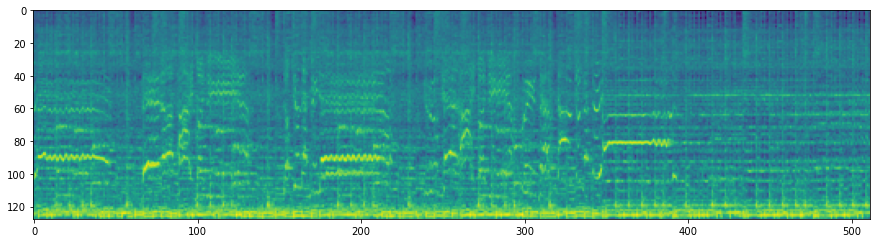

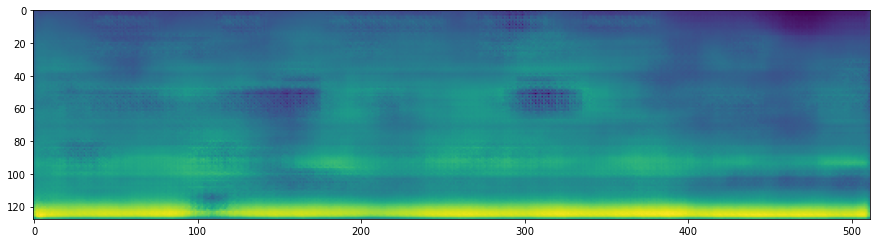

In [149]:
test_img = prediction_gen.take(0)[0]

prediction = autoencoder(test_img)

plt.figure(figsize=(15,5))
plt.imshow(test_img[0])
plt.show()
plt.figure(figsize=(15,5))
plt.imshow(np.array(prediction[0]*255))

In [150]:
results = []
search_range = 10000
for i in range(search_range):
    filename, latent_img, _ = prediction_gen.take(i, return_filename=True)
    
    latent_space = np.array(autoencoder.encoder(latent_img))[0]
    
    result={
        'id':str(filename[0]).split('.')[0],
        'filename':str(filename[0]),
          }
    for idx, col in enumerate(latent_space):
        result[f'latent_{idx}'] = col
        
    results.append(result)
    print(f'{i+1} / {search_range}', end='\r')

    

In [151]:
results_df = pd.DataFrame(results)

In [152]:
results_df

,id,filename,latent_0,latent_1,latent_2,latent_3,latent_4,latent_5,latent_6,latent_7,...,latent_246,latent_247,latent_248,latent_249,latent_250,latent_251,latent_252,latent_253,latent_254,latent_255
0,2e2aOrLcQTUEXR4hqRmZu5,2e2aOrLcQTUEXR4hqRmZu5.png,-10.882201,27.066702,121.169258,-28.955580,-25.688265,-60.657146,-119.164162,24.533825,...,-12.474596,-146.062927,-116.019447,-58.945072,60.173317,19.548061,89.517578,-72.462036,19.056911,60.386105
1,2fcgTWuAWQIcXYXUnwtJqo,2fcgTWuAWQIcXYXUnwtJqo.png,-2.187697,13.758948,111.087273,-37.702877,-15.375639,-50.661114,-108.935669,33.157684,...,3.535387,-130.392426,-99.447327,-42.088833,55.414921,-7.906574,77.653862,-65.568031,10.759628,38.094139
2,0pye6X7VSva1U7HpnL0yiW,0pye6X7VSva1U7HpnL0yiW.png,12.186346,2.383364,106.274139,-27.968575,-5.995533,-47.665947,-111.403854,7.452196,...,-27.576468,-131.208267,-92.739349,-43.234238,57.580254,15.920404,88.329163,-63.535843,17.207870,34.859432
3,3cv3tlIPrRstA4CkO5N84r,3cv3tlIPrRstA4CkO5N84r.png,-5.983634,36.377930,102.774017,-17.491373,-40.027260,-86.181694,-109.829437,37.194717,...,6.009501,-137.826950,-100.568626,-77.018715,65.184372,55.272263,79.530472,-74.956429,26.383163,84.315720
4,2rYx0sGKM5r0VwKqAWbjQM,2rYx0sGKM5r0VwKqAWbjQM.png,-9.071003,10.881642,115.356560,-20.489296,-39.769966,-57.410442,-121.159447,20.806244,...,8.338309,-131.751297,-94.523270,-49.277378,61.660011,14.837057,68.732834,-80.908508,-16.125204,36.542892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3eCEFxK85hlMD2qRATZB0E,3eCEFxK85hlMD2qRATZB0E.png,-12.310179,6.575758,121.009499,-51.162964,-20.795828,-69.128494,-119.988770,2.218783,...,1.223959,-135.756500,-95.715263,-47.700756,59.547836,11.330128,76.441940,-78.346199,-10.402286,30.355684
9996,1YbZy5djM0mXJRVFanXeUn,1YbZy5djM0mXJRVFanXeUn.png,-2.332427,5.888753,130.341766,-38.504749,-47.365589,-63.309048,-131.612396,7.661264,...,-20.277908,-140.324020,-104.550087,-45.391266,66.834457,34.200371,81.306488,-82.832260,4.670295,49.268360
9997,4UVXeZKxN3n43pRk3nHNfo,4UVXeZKxN3n43pRk3nHNfo.png,-15.150504,37.014793,126.421860,-44.862667,-49.348801,-64.960648,-121.109863,20.976967,...,-8.994312,-141.476685,-109.616875,-69.628815,65.823395,20.058846,89.872368,-74.842125,15.503600,63.870163
9998,5xAGbHEbEUswFidp7tMvqn,5xAGbHEbEUswFidp7tMvqn.png,-2.979941,22.423523,119.457268,-39.518528,-36.149952,-67.564980,-106.724670,46.161266,...,-12.273746,-137.731934,-114.376129,-58.887928,57.016228,28.269857,102.721298,-70.826324,21.002535,72.755402


In [153]:
tracks_df = feather.read_feather('data/all_tracks.feather')

In [154]:
track_latents = results_df.merge(tracks_df, how='left', left_on='id', right_on='track_id')

In [155]:
track_latents = track_latents.drop_duplicates(subset='id')

In [156]:
def get_top_genre(x):
    if len(x) > 0:
        return x[0]
    else:
        return float('nan')

track_latents['genre'] = track_latents['artist_genres'].apply(get_top_genre)

In [176]:
track_latents.genre.value_counts()[:50]

classic hardstyle        456
contemporary gospel      419
gospel                   374
album rock               362
dark wave                284
fingerstyle              222
alternative metal        212
euphoric hardstyle       210
gothic metal             185
hardcore                 168
italian disco            152
corrosion                147
crust punk               141
ccm                      140
grindcore                136
chaotic hardcore         130
melodic hardcore         127
hardcore punk            125
deep progressive rock    120
dark rock                115
beatdown                 114
california hardcore      111
boston hardcore          104
grunge                   100
doom metal                97
anarcho-punk              96
blues rock                91
cantautor                 89
latin alternative         86
american grindcore        83
p funk                    80
instrumental rock         80
coverchill                79
glam metal                77
crossover thra

In [157]:
artist_latents = track_latents.groupby('artist_name').mean().dropna()

In [158]:
genre_latents = track_latents.groupby('genre').mean().dropna()

In [159]:
latent_cols = [f'latent_{i}' for i in range(256)]

In [160]:
track_latents = track_latents.reset_index(drop=True)

In [197]:
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

cos = []
for i in artist_latents.index:
    similiarity = cosine_similarity(np.array([track_latents.loc[106, latent_cols]]), np.array([artist_latents.loc[i, latent_cols]]))
    cos.append((similiarity, i))
    
sorted(cos, key=lambda x: x[0], reverse=True)

[(array([[0.99761008]]), 'Joey Ramone'),
 (array([[0.99749875]]), 'John Petrucci'),
 (array([[0.99737817]]), 'Prong'),
 (array([[0.99670533]]), 'Bella Morte'),
 (array([[0.99667333]]), 'Flop'),
 (array([[0.99617622]]), 'Coalesce'),
 (array([[0.99608587]]), 'Cuca'),
 (array([[0.99582146]]), 'Les Sales Majestés'),
 (array([[0.99580991]]), 'Crowbar'),
 (array([[0.99561604]]), "Scarlet's Remains"),
 (array([[0.99543465]]), 'Floorpunch'),
 (array([[0.9953779]]), 'Human Drama'),
 (array([[0.99533407]]), 'Los Rebeldes'),
 (array([[0.99528983]]), 'Macbeth'),
 (array([[0.99520819]]), 'Skinny Girl Diet'),
 (array([[0.99518682]]), 'Vendemmian'),
 (array([[0.995181]]), 'Mandragora Scream'),
 (array([[0.99512701]]), 'Dinamita Pa Los Pollos'),
 (array([[0.99511178]]), 'Steve Vai'),
 (array([[0.99510621]]), 'Loquillo'),
 (array([[0.99508285]]), 'Chaos UK'),
 (array([[0.99507476]]), 'Casey J'),
 (array([[0.99506163]]), 'Lacrimosa'),
 (array([[0.99503914]]), '24-7 Spyz'),
 (array([[0.99501938]]), 'Leew

In [198]:
cos = []
for i in track_latents.index:
    similiarity = cosine_similarity(np.array([track_latents.loc[106, latent_cols]]), np.array([track_latents.loc[i, latent_cols]]))
    cos.append((similiarity, i))
    
sorted(cos, key=lambda x: x[0], reverse=True)

[(array([[1.]]), 106),
 (array([[0.99740536]]), 5856),
 (array([[0.99707747]]), 2473),
 (array([[0.99688959]]), 7384),
 (array([[0.99670376]]), 3806),
 (array([[0.99660405]]), 6429),
 (array([[0.99656064]]), 50),
 (array([[0.99646364]]), 8164),
 (array([[0.99640995]]), 1130),
 (array([[0.99633661]]), 3898),
 (array([[0.99631258]]), 5349),
 (array([[0.99623426]]), 7596),
 (array([[0.99614729]]), 4250),
 (array([[0.9959516]]), 4089),
 (array([[0.99594976]]), 4865),
 (array([[0.99586361]]), 8593),
 (array([[0.99577285]]), 4563),
 (array([[0.99577194]]), 4805),
 (array([[0.99576466]]), 3105),
 (array([[0.99574434]]), 7085),
 (array([[0.9956925]]), 6099),
 (array([[0.99566996]]), 9080),
 (array([[0.99564574]]), 3364),
 (array([[0.99561763]]), 7240),
 (array([[0.99559241]]), 7237),
 (array([[0.99556706]]), 468),
 (array([[0.99552011]]), 9200),
 (array([[0.99551593]]), 6444),
 (array([[0.99545474]]), 6711),
 (array([[0.99544159]]), 4183),
 (array([[0.9954176]]), 5677),
 (array([[0.99541454]])

In [199]:
cos = []
for i in genre_latents.index:
    similiarity = cosine_similarity(np.array([track_latents.loc[106, latent_cols]]), np.array([genre_latents.loc[i, latent_cols]]))
    cos.append((similiarity, i))
    
sorted(cos, key=lambda x: x[0], reverse=True)

[(array([[0.99673683]]), 'funk metal'),
 (array([[0.99558522]]), 'instrumental rock'),
 (array([[0.99547536]]), 'spanish new wave'),
 (array([[0.99535518]]), 'metal guitar'),
 (array([[0.99483346]]), 'comic metal'),
 (array([[0.99460148]]), 'psychedelic doom'),
 (array([[0.99453036]]), 'crossover thrash'),
 (array([[0.99451558]]), 'boston hardcore'),
 (array([[0.99449927]]), 'deathrock'),
 (array([[0.99445697]]), 'chain punk'),
 (array([[0.99434902]]), 'bitpop'),
 (array([[0.99425385]]), 'melodic hard rock'),
 (array([[0.99421217]]), 'alternative metal'),
 (array([[0.99406915]]), 'french punk'),
 (array([[0.99406003]]), 'australian metal'),
 (array([[0.99403937]]), 'california hardcore'),
 (array([[0.99395229]]), "punk 'n' roll"),
 (array([[0.99379839]]), 'latin metal'),
 (array([[0.99376804]]), 'new wave pop'),
 (array([[0.99357887]]), 'portland metal'),
 (array([[0.99351597]]), 'soft rock'),
 (array([[0.99331885]]), 'hard rock'),
 (array([[0.99331208]]), 'sludge metal'),
 (array([[0.

In [178]:
track_latents.iloc[51]['track_uri']

'spotify:track:1cjBan0t4eBk2Y5j17hdyf'

In [200]:
track_latents.iloc[5856]['track_uri']

'spotify:track:1Qjp4VEOz7usvQTDLf3D2I'

In [195]:
track_latents[track_latents['artist_name'] == 'Joey Ramone']['track_uri']

106     spotify:track:10gYWhyOBYVmxYbG8zf2KR
330     spotify:track:3BmEnKPtRDJmXvRtG4s2Em
1572    spotify:track:04cdEVbQPb8BJb7593e5fO
2128    spotify:track:3CUZp8ip8Rv5vHaGxhq7e4
2282    spotify:track:0HGZSliJe9iTZUa7yNX1Oe
5077    spotify:track:0Bnv5LjWbBRfuA6wC01DeB
6861    spotify:track:4kOoKdZI5ZJ4INrsuxxNqv
7384    spotify:track:6XHvpwbgTE0JDidNHGtaYx
8847    spotify:track:5iG0AilhX8EuFJE1JZK15T
9762    spotify:track:3YkCLSlG5TxlFbnylGe3s4
Name: track_uri, dtype: object